In [1]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical   
#from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers, optimizers   #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.callbacks import EarlyStopping
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score 




# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set seed for all 
tf.random.set_seed(42) 
random.seed(42)
np.random.seed(42)

### Loading data

In [3]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Implementation Steps:
1. Flatten the Fashion MNIST images into 1D vectors (28x28 = 784 features).
2. Normalize the pixel values to the range [0, 1] or standardize them to have zero mean and unit variance.
3. Use an SVM with an RBF kernel and tune hyperparameters like C (regularization) and gamma (kernel width) using cross-validation.

In [4]:


# Adding names to classes, we only have numbers
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

For normalizing: do we also want to subtract the mean?
https://www.educative.io/answers/data-normalization-in-python


In [5]:
'''
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)
'''

'\n# Convert labels to one-hot encoding\ntrain_labels = to_categorical(train_labels, num_classes=10)\ntest_labels = to_categorical(test_labels, num_classes=10)\n'

### Flatten, normalize and standardize images to input in SVC

In [6]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)


# Normalize pixel values
train_images_flat = train_images_flat/255.0
test_images_flat = test_images_flat/255.0

scaler = StandardScaler()
train_images_flat = scaler.fit_transform(train_images_flat)
test_images_flat = scaler.fit_transform(test_images_flat)

print(train_images_flat.shape)
print(test_images_flat.shape)

(60000, 784)
(10000, 784)


### Initialize and train SVC

In [7]:
# Initialize SVC model
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale') 

# Train
svc_model.fit(train_images_flat, train_labels)

SVC()

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Text(0.5, 1.0, 'Confusion Matrix')

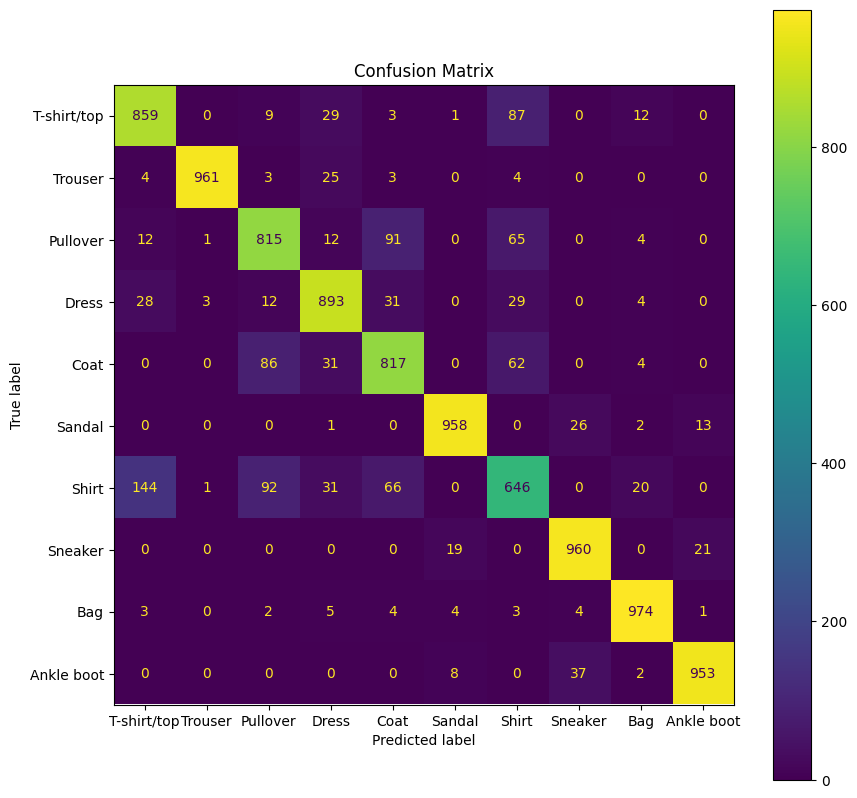

In [9]:
# Predict on test data
test_predictions = svc_model.predict(test_images_flat)

# Print classification report
print(classification_report(test_labels, test_predictions))

# Confusion matrix
cm = confusion_matrix(test_labels, test_predictions)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
ax.grid(False)
plt.title(f'Confusion Matrix')


60000

In [13]:
C = 5
alpha = 1/(C*len(train_labels))

#lin_clf = LinearSVC
#svm_clf = SVC
sgd_clf = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, 
                        alpha=alpha)

In [14]:
sgd_clf.fit(train_images_flat, train_labels)

SGDClassifier(alpha=3.3333333333333333e-06, eta0=0.001,
              learning_rate='constant')

In [15]:
test_predictions = sgd_clf.predict(test_images_flat)


Text(0.5, 1.0, 'Confusion Matrix')

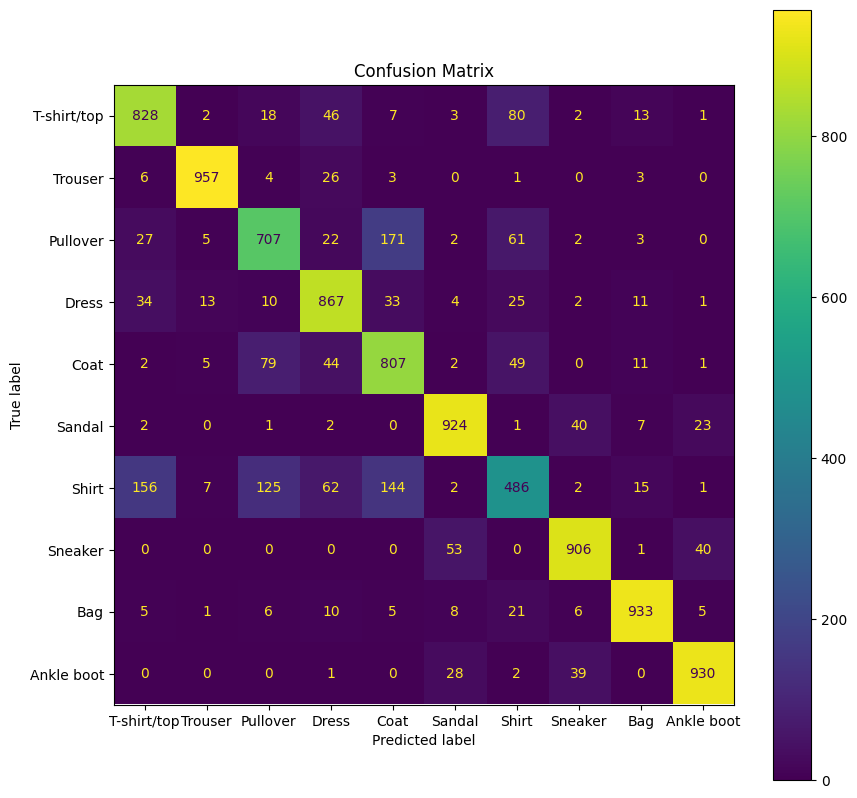

In [16]:
# Confusion matrix
cm = confusion_matrix(test_labels, test_predictions)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
ax.grid(False)
plt.title(f'Confusion Matrix')

### Grid search

https://www.geeksforgeeks.org/image-classification-using-support-vector-machine-svm-in-python/

In [18]:
param_grid = {'C':[0.1,1,10,100],
              'gamma': [0.0001,0.001,0.1,1],
              'kernel':['rbf','poly']}

# Creating a support vector classifier
svc = SVC(probability=True)

# Create a midel using gridsearchCV with parameters grid
model = GridSearchCV(svc,param_grid)


In [ ]:
# Training the model using training data
model.fit(train_images_flat,train_labels)

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(test_images_flat)

accuracy = accuracy_score(y_pred, test_labels)

print(f'The model is {accuracy*100} % accurate')

### NEw


In [1]:
from sklearn.model_selection import train_test_split


In [ ]:
# Define a validation set (20%)
'''
X_train, X_test, y_train, y_test = train_test_split(test_images_flat, test_labels, test_size=0.2)
'''

In [8]:
svc = SVC(kernel='linear', gamma='auto')
svc.fit(train_images_flat, train_labels) # Can you add a validation split here?

SVC(gamma='auto', kernel='linear')